## Import libraries

Note: At the first run you may encounter warnings but this can be ignored since these warnings are non-critical.

In [1]:
# Import necessary libraries for data manipulation
import pandas as pd  # For working with data in tables
import numpy as np   # For numerical operations
import random       # For generating random numbers
import os           # For working with the operating system
from tqdm.notebook import tqdm  # For creating progress bars

# Import a library for optimisation
from scipy.optimize import minimize

# Import libraries for date-time manipulation
from datetime import timedelta as tdelta  # For working with time intervals
from dateutil.parser import parse        # For parsing date and time

# Import library to retrieve assets' data
import yfinance as yf

# Import freadapi to retrieve exogenous variable
from fredapi import Fred
api_key = 'my_api_key'  # Instantiate the Fred object with your API key
fred = Fred(api_key=api_key)

# Import library for plotting graphs
import matplotlib.pyplot as plt  # For creating visualisations
plt.style.use('seaborn-darkgrid')  # Set the style for the plots
import seaborn as sns

# Ignore warnings to keep the code clean
import warnings
warnings.simplefilter('ignore')

# Import TensorFlow and Keras for deep learning tasks
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping

# Import a library for scaling data
from sklearn.preprocessing import StandardScaler


import seaborn as sns
plt.style.use('seaborn-darkgrid')

# Import dendrogram, linkage to create dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

# Import library for covariance matrix
from pypfopt import risk_models
from pypfopt import plotting
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import objective_functions


# Import libraries for backtesting
import pyfolio as pf

import copy


"""
The following commands are only used to set up random seeds for the system in
order to generate reproducible results.
"""
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

C:\Users\LucaDonghi\AppData\Local\Temp\ipykernel_17948\2491524003.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Set the style for the plots


The function set_seed(seed_val) is designed to set seeds for the random number generators in both the TensorFlow (tf) and NumPy (np) libraries, as well as the built-in Python random module. This is crucial for ensuring the reproducibility of the results in this notebook.

In [2]:
def set_seed(seed_val):
    """
    Set seed for reproducibility in Python, TensorFlow, and NumPy.

    Parameters:
    - seed_val (int): Seed value to set for random number generators.

    Returns:
    - None
    """
    # Set the seed for Python's hash function
    os.environ['PYTHONHASHSEED'] = str(seed_val)
    
    # Set the seed for TensorFlow
    tf.random.set_seed(seed_val)
    
    # Set the seed for NumPy
    np.random.seed(seed_val)
    
    # Set the seed for Python's built-in random module
    random.seed(seed_val)

## Import data

ASSETS UNIVERSE
    
- IVV: iShares Core S&P 500 ETF
- IEV: iShares Europe ETF
- EWJ: iShares MSCI Japan ETF
- EEM: iShares MSCI Emerging Markets ETF
- TLT: iShares 20+ Year Treasury Bond ETF
- LQD: iShares iBoxx Investment Grade Corporate Bond ETF
- EMB: iShares iBoxx Investment Grade Corporate Bond ETF
- HYG: iShares iBoxx High Yield Corporate Bond ETF
- GSG: iShares S&P GSCI Commodity-Indexed Trust
- IEML.L: iShares J.P. Morgan EM Local Govt Bond UCITS ETF
- IGIL.L: iShares Global Inflation Linked Govt Bond UCITS ETF
- IGLN.L: iShares Physical Gold ETC
    
    

In [3]:
# Tickers list
tickers = ["IVV", "IEV", "EWJ", "EEM", "TLT", "LQD", "EMB", "HYG", "GSG", "IEML.L", "IGIL.L", "IGLN.L"]
start = "2012-12-31"
end = "2023-12-31"
data = yf.download(tickers, period="1d", start=start, end=end)['Adj Close']

[*********************100%***********************]  12 of 12 completed


In [4]:
data.head()

,EEM,EMB,EWJ,GSG,HYG,IEML.L,IEV,IGIL.L,IGLN.L,IVV,LQD,TLT
Date,,,,,,,,,,,,
2012-12-31,34.598511,72.027992,32.637753,32.790001,50.657692,52.579212,28.179195,152.000000,33.060001,116.268295,82.299782,90.615005
2013-01-02,35.277218,72.227478,33.441154,32.889999,51.135208,52.981647,28.587904,150.554993,33.700001,119.103142,82.490257,89.403625
2013-01-03,35.027576,72.180527,33.139877,32.730000,50.977852,52.943314,28.200712,149.660004,33.439999,118.948853,82.041306,88.192207
2013-01-04,35.097786,71.957596,33.005981,32.660000,51.010391,52.469723,28.401480,148.279999,32.700001,119.533638,82.000488,88.536209
2013-01-07,34.832554,71.998634,32.704712,32.840000,51.053841,52.707882,28.379971,148.860001,32.810001,119.160011,82.136505,88.573563


In [5]:
data.tail()

,EEM,EMB,EWJ,GSG,HYG,IEML.L,IEV,IGIL.L,IGLN.L,IVV,LQD,TLT
Date,,,,,,,,,,,,
2023-12-22,39.109959,86.824051,62.865116,20.330000,75.111542,43.653568,51.420334,157.384995,40.182499,472.890625,107.677574,96.555420
2023-12-26,39.417828,87.136078,62.845264,20.620001,75.256973,NaN,51.704102,NaN,NaN,474.928009,107.902512,96.829948
2023-12-27,39.646252,87.448112,63.192692,20.480000,75.567230,44.041809,51.958511,158.350006,40.497501,475.832397,108.909851,98.545746
2023-12-28,39.954128,87.204338,63.569904,20.180000,75.324844,43.861893,51.655178,157.335007,40.375000,476.051056,108.626236,97.830009
2023-12-29,39.934265,86.843552,63.669170,20.059999,75.033966,43.833488,51.723671,156.580002,40.209999,474.689484,108.225250,96.947594


In [6]:
data.fillna(method='ffill', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2829 entries, 2012-12-31 to 2023-12-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EEM     2829 non-null   float64
 1   EMB     2829 non-null   float64
 2   EWJ     2829 non-null   float64
 3   GSG     2829 non-null   float64
 4   HYG     2829 non-null   float64
 5   IEML.L  2829 non-null   float64
 6   IEV     2829 non-null   float64
 7   IGIL.L  2829 non-null   float64
 8   IGLN.L  2829 non-null   float64
 9   IVV     2829 non-null   float64
 10  LQD     2829 non-null   float64
 11  TLT     2829 non-null   float64
dtypes: float64(12)
memory usage: 287.3 KB


### Assets performance comparison

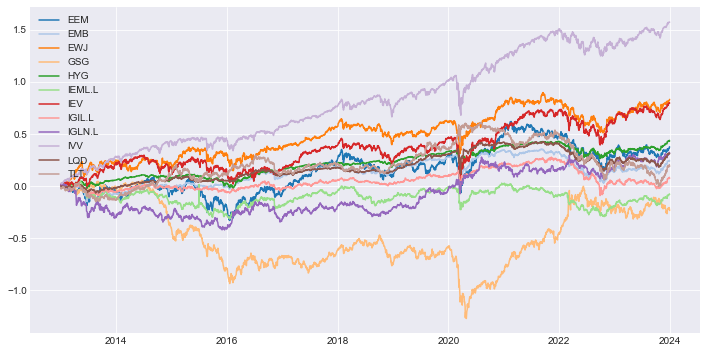

In [8]:
# Plot returns of assets with 11 different colors
plt.figure(figsize=(12, 6))

# Iterate through each column in the DataFrame and plot its cumulative returns with a distinct color
for column, color in zip(data.columns, plt.cm.tab20.colors):
    plt.plot(data[column].pct_change().cumsum(), label=column, color=color)

plt.legend()
plt.show()

In [11]:
df = data

In [27]:
# Calculate annual returns
df['Year'] = df.index.year
annual_returns = df.groupby('Year').apply(lambda x: (x.iloc[-1] / x.iloc[0]) - 1)

# Exclude the year 2012
annual_returns = annual_returns.loc[annual_returns.index != 2012]

# Create a DataFrame with the year as columns and the assets ranked by annual return
ranked_returns = pd.DataFrame()

for year in annual_returns.index:
    sorted_returns = annual_returns.loc[year].sort_values(ascending=False)
    ranked_returns[year] = [f"{asset}: {ret:.2%}" for asset, ret in sorted_returns.items()]

ranked_returns.index = range(len(ranked_returns))

# Remove "Year: 0.00%" and shift cells up
for col in ranked_returns.columns:
    ranked_returns[col] = ranked_returns[col].apply(lambda x: np.nan if "Year" in x else x)
    ranked_returns[col] = ranked_returns[col].dropna().reset_index(drop=True)

# Remove the last row with NaN values
ranked_returns = ranked_returns.dropna()

# Apply RedYellowGreen formatting
def red_yellow_green_formatting(val, min_val, max_val):
    red = [255, 0, 0]
    yellow = [255, 255, 0]
    green = [0, 255, 0]
    
    if min_val == max_val:
        return 'background-color: rgb(255, 255, 0)'  # Neutral color if no range
    
    ratio = (val - min_val) / (max_val - min_val)
    if ratio <= 0.5:
        r = int(red[0] + ratio * 2 * (yellow[0] - red[0]))
        g = int(red[1] + ratio * 2 * (yellow[1] - red[1]))
        b = int(red[2] + ratio * 2 * (yellow[2] - red[2]))
    else:
        r = int(yellow[0] + (ratio - 0.5) * 2 * (green[0] - yellow[0]))
        g = int(yellow[1] + (ratio - 0.5) * 2 * (green[1] - yellow[1]))
        b = int(yellow[2] + (ratio - 0.5) * 2 * (green[2] - yellow[2]))
        
    return f'background-color: rgb({r}, {g}, {b})'

# Apply the color formatting
def style_ranking(ranking_df):
    min_val = ranking_df.applymap(lambda x: float(x.split(': ')[1].strip('%')) if pd.notna(x) else np.nan).min().min()
    max_val = ranking_df.applymap(lambda x: float(x.split(': ')[1].strip('%')) if pd.notna(x) else np.nan).max().max()
    return ranking_df.applymap(lambda x: red_yellow_green_formatting(float(x.split(': ')[1].strip('%')), min_val, max_val) if pd.notna(x) else '')

# Format rankings DataFrame with RedYellowGreen formatting
styled_rankings = ranked_returns.style.apply(style_ranking, axis=None)

# Display the styled DataFrame
styled_rankings

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,IVV: 29.16%,TLT: 26.92%,EWJ: 8.98%,HYG: 14.09%,EEM: 35.64%,TLT: -0.54%,IVV: 31.19%,IGLN.L: 23.61%,GSG: 39.79%,GSG: 23.57%,IVV: 26.86%
1,EWJ: 22.97%,IVV: 14.58%,EMB: 1.40%,EEM: 13.98%,IEV: 24.55%,HYG: -2.11%,IEV: 24.70%,IVV: 17.28%,IVV: 30.56%,IGLN.L: -0.09%,EWJ: 19.72%
2,IEV: 22.38%,LQD: 8.00%,IVV: 1.35%,IVV: 13.13%,EWJ: 23.26%,IGLN.L: -2.52%,EWJ: 18.52%,TLT: 16.83%,IEV: 15.50%,IEML.L: -10.81%,IEV: 18.39%
3,HYG: 4.77%,EMB: 6.03%,LQD: -1.60%,GSG: 10.98%,IVV: 20.90%,LQD: -3.14%,IGLN.L: 17.97%,EEM: 14.69%,HYG: 3.97%,HYG: -10.94%,IGLN.L: 12.83%
4,GSG: -2.13%,IGIL.L: 4.55%,IEV: -2.81%,IEML.L: 10.02%,IEML.L: 14.33%,IGIL.L: -3.77%,EEM: 17.92%,EWJ: 14.21%,IGIL.L: 2.97%,IEV: -15.01%,IEML.L: 11.60%
5,LQD: -2.23%,HYG: 1.72%,TLT: -2.87%,EMB: 9.38%,IGLN.L: 11.54%,IVV: -5.20%,LQD: 17.01%,IGIL.L: 11.67%,EWJ: 2.37%,LQD: -17.04%,HYG: 11.33%
6,IGIL.L: -4.56%,EEM: -0.05%,IGIL.L: -4.52%,IGLN.L: 7.43%,EMB: 9.91%,EMB: -5.71%,EMB: 15.48%,LQD: 10.74%,LQD: -1.34%,EWJ: -17.81%,EMB: 10.13%
7,EEM: -5.50%,IGLN.L: -2.48%,HYG: -5.02%,LQD: 6.26%,IGIL.L: 8.98%,IEML.L: -7.95%,GSG: 15.05%,EMB: 5.29%,EMB: -1.69%,EMB: -17.81%,LQD: 8.65%
8,EMB: -8.05%,IEML.L: -4.16%,IGLN.L: -11.22%,EWJ: 4.40%,TLT: 8.72%,GSG: -14.36%,HYG: 14.24%,HYG: 4.03%,EEM: -4.24%,IVV: -18.65%,EEM: 8.04%
9,IEML.L: -11.57%,EWJ: -4.66%,IEML.L: -14.71%,IGIL.L: 3.25%,LQD: 6.96%,EWJ: -14.61%,TLT: 13.52%,IEV: 3.26%,TLT: -4.48%,EEM: -21.13%,IGIL.L: 4.91%


### Correlation matrix of assets

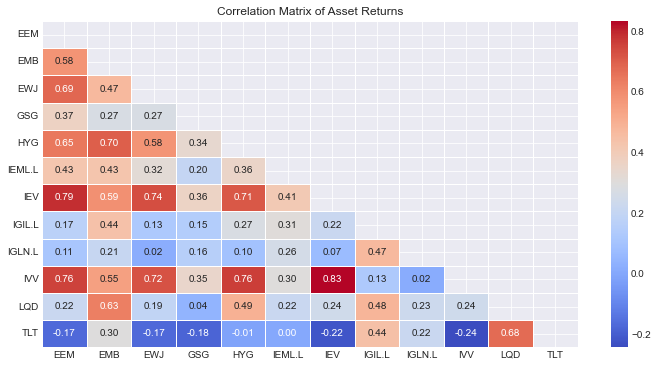

In [8]:
# Calculate the correlation matrix for the returns
correlation_matrix = data.pct_change().corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of Asset Returns')
plt.show()

### Calculate matrix with transposed returns

In [9]:
rets = data.pct_change().fillna(0)
rets_T = rets.T
rets_T.head()

Date,2012-12-31,2013-01-02,2013-01-03,2013-01-04,2013-01-07,2013-01-08,2013-01-09,2013-01-10,2013-01-11,2013-01-14,...,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29
EEM,0.0,0.019617,-0.007076,0.002004,-0.007557,-0.008959,0.004294,0.008776,-0.008030,0.004272,...,-0.005967,-0.000500,0.008509,-0.018002,0.018795,-0.004802,0.007872,0.005795,0.007766,-0.000497
EMB,0.0,0.002768,-0.000649,-0.003089,0.000571,-0.004562,-0.000818,-0.000246,-0.004998,0.001482,...,-0.001350,0.000225,0.002478,0.000113,0.001798,-0.001346,0.003594,0.003581,-0.002788,-0.004137
EWJ,0.0,0.024616,-0.009009,-0.004040,-0.009128,-0.013306,0.013486,0.008188,0.003046,0.006073,...,-0.008632,-0.001900,0.003014,-0.005051,0.017405,0.003168,-0.000316,0.005528,0.005969,0.001562
GSG,0.0,0.003050,-0.004865,-0.002139,0.005511,0.002436,-0.002126,0.004262,-0.003334,0.008516,...,0.003486,0.008437,0.009843,-0.010234,0.004924,-0.003920,0.014265,-0.006790,-0.014648,-0.005947
HYG,0.0,0.009427,-0.003077,0.000638,0.000851,-0.000743,0.001914,0.001699,0.001802,-0.001375,...,-0.002205,0.000650,0.002858,0.000130,0.004533,-0.001161,0.001937,0.004122,-0.003207,-0.003862


### Plot dendrogram

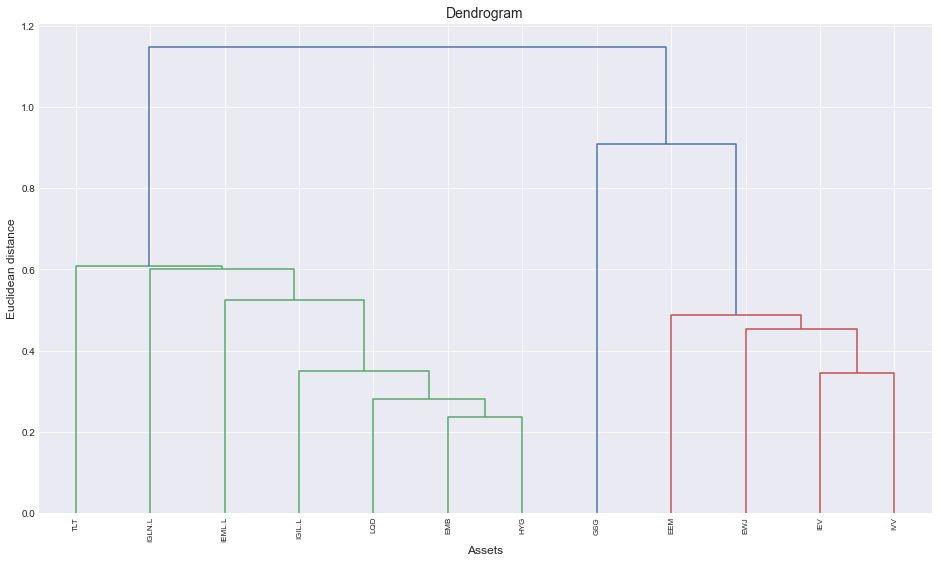

In [10]:
# Define the size of the graph
plt.figure(figsize=(16, 9))

# Title of the chart
plt.title('Dendrogram', fontsize=14)

# Create linkage matrix
linkage_matrix = linkage(rets_T, method='ward')

# Create dendrogram
dendrogram(linkage_matrix, labels=rets_T.index)

# Define labels
plt.xlabel("Assets", fontsize=12)
plt.ylabel('Euclidean distance', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.show()

### Get clusters

In [11]:
# Step 1: Define an agglomerative clustering model
model = AgglomerativeClustering(n_clusters=4,
                                  affinity='euclidean', linkage='ward')

# Step 2: Call fit_predict_method on scaled training data. This labels the funds as 0 and 1
clusters = model.fit_predict(rets_T)

# Step 3: Get clusters
cluster_1 = rets_T.loc[clusters == 0, :].index

cluster_2 = rets_T.loc[clusters == 1, :].index

cluster_3 = rets_T.loc[clusters == 2, :].index

cluster_4 = rets_T.loc[clusters == 3, :].index

# Cluster_1
print(f'The funds in cluster_1 are: {cluster_1.to_list()}')

# Cluster_2
print(f'The funds in cluster_2 are: {cluster_2.to_list()}')

# Cluster_3
print(f'The funds in cluster_3 are: {cluster_3.to_list()}')

# Cluster_4
print(f'The funds in cluster_4 are: {cluster_4.to_list()}')


The funds in cluster_1 are: ['EMB', 'HYG', 'IEML.L', 'IGIL.L', 'IGLN.L', 'LQD']
The funds in cluster_2 are: ['EEM', 'EWJ', 'IEV', 'IVV']
The funds in cluster_3 are: ['GSG']
The funds in cluster_4 are: ['TLT']


## MV WFO - Long only with no leverage

There are two conditions which you use to set the constraints for the portfolio.
- `lower_bound`: Setting this condition to `-1` will imply that you are including short-selling in your portfolio as well.
- `allocation_type`: Setting this condition to `eq` means that you are only using 100% of your capital and not including leverage. 

### Calculate Sharpe ratio

In the function definition, you will note that we return the negative of the Sharpe. This is because we are using a mimisation routine later on for calculating optimal weights and thus, the lowest negative value will give us the maximum Sharpe ratio.

In [12]:
# Define a function to calculate the Sharpe ratio given weights and daily returns
def sharpe(w, daily_returns):
    # Calculate the portfolio returns by multiplying weights with daily returns 
    # and summing along the columns
    r = (w * daily_returns).sum(axis=1)
    
    # Calculate the Sharpe ratio as the negative of the mean of returns 
    # divided by the standard deviation of returns, 
    # multiplied by 16
    # Multiplying by 16 is a scaling factor often used for annualising the Sharpe ratio
    return -(r.mean() - 0.02) / r.std() * 16

<a id='optimise'></a>
### Define the Optimal Weights Allocation Function

Let's break down the optimisation routine in the following manner.

**Starting Weights**: 

Think of starting weights as your initial plan for how much money you'd put into each investment. You begin with an equal-weighted portfolio, which means every investment gets the same portion of your cash.

**Bounds**:

Bounds are like rules you set for how much money you're willing to invest in each asset. In our case, since we're only interested in investing without borrowing money (no leverage), we set the upper limit for each asset to be 1 (100% of your available cash), and the lower limit to be 0 (you won't invest negative amounts). So, it's like saying, "I won't put more than 100% or less than 0% into any single investment."

If you were considering a long/short portfolio (meaning you could both invest and short-sell assets), the lower limit might be -1, allowing you to borrow to invest or bet against assets.

**Constraints**:

Constraints are rules that consider the entire portfolio as a whole. For example, you might want to make sure that you're not using leverage (borrowing too much money to invest). In this case, you'd set a constraint to ensure that the sum of all your weights equals 1, which means you're only investing the amount of money you have and not more.

Constraints have two types: `eq` for equality and `ineq` for inequality. Here, `eq` means you will invest 100% of your capital, and `ineq` indicates that you are fine with adding leverage. You can think of these as "must-have" and "should-have" rules. They ensure your portfolio behaves the way you want it to.

So, in a nutshell, this optimisation routine is all about making sure you start with some reasonable weights, setting limits on how much you invest in each asset, and defining rules for your overall portfolio behaviour. It's like having a plan and some guardrails for your investments.

For this notebook, you will make sure that you are not adding leverage to your position and investing only 100% of your capital.

So, the sum of weights should be equal to 1.

i.e. $\sum{w}=1$

You can rewrite this as,

$0=\sum{w}-1$

You are creating a function which will calculate the sum of weights. And the `eq` constraint of the function will make sure that the sum of weights minus 1 will always be 0.

Let's break down the function call now:

**Objective Function**:
The "objective function" is like your main goal in this optimization process. In our case, we want to find the best combination of weights for our assets that maximises the Sharpe Ratio. The Sharpe Ratio helps us measure the risk-adjusted performance of our portfolio. However, there's a trick: when using the `minimize` function, we actually want to find the *minimum* value of the negative Sharpe Ratio, which is the same as maximising the regular Sharpe Ratio.

**Starting Point**:
The `x0` parameter is like where you begin your search for the best weights. In this example, we're starting with equal weights for all the assets. (w is set to (1 divided by the number of assets) for each asset).

**Additional Information**:
The `args` parameter is for any extra information you want to give to the objective function. Here, we're passing in our daily returns data (`daily_returns`) so that we can calculate the Sharpe ratio. And further, try to optimise this using various combinations of weights for the assets.

**Bounds**:
The `bounds` parameter is like putting limits on how much you can invest in each asset. We're saying you can invest between 0% and 100% in each asset (long-only), so no short-selling.

**Constraints**:
The `constraints` parameter allows us to add more rules. In this case, we're using `eq` to make sure the sum of all weights equals to 1, which means we're fully investing our money and not using leverage.

So, when you put it all together, you're telling the computer to find the best weights for your assets by minimising the negative Sharpe Ratio, starting with equal weights, and following the rules that you've set. It's like a recipe for finding the best mix of investments that matches your financial goals and risk tolerance.

In [13]:
# Define a function to calculate optimal portfolio weights
def optimal_weights(daily_returns, lower_bound, type='allocation_type'):

    # Initialise weights equally across all assets
    w = np.ones(len(daily_returns.columns)) / len(daily_returns.columns)

    # Create bounds for weights, limiting them between 'lower_bound' and 1
    bounds = [(lower_bound, 1) for _ in range(len(w))]

    # Define a constraint: the sum of weights should be equal to 1
    constraint = {'type': type, 'fun': lambda x: sum(x) - 1}

    # Use the 'minimize' function to find the optimal weights by maximising the negative Sharpe ratio
    result = minimize(sharpe, x0=w, args=(daily_returns,),
                      bounds=bounds, constraints=constraint)

    # Return the optimal portfolio weights
    return result.x

<a id='calculate'></a>
### Calculate Optimal Weights

Let's simplify and break down the process step by step:

**Step 1: Running Optimization Multiple Times**:
We're going to run our optimisation several times, each time looking at a different chunk of our data. This helps us see how our strategy would perform over time. The chunk of data we're looking at grows each time we do this.

**Step 2: Collecting and Reorganising Weights**:
We keep track of the weights we find during each optimisation run in a dictionary. Then, we organise these weights in a table (Pandas data frame) for easier analysis. However, we need the weights to match our returns, so we reorganise them by aligning them with the returns' timestamps. This way, we can calculate how our strategy would perform using these weights.

**Step 3: Calculating Strategy Returns**:
Now, with the correct weights for the entire return series, we can figure out how our strategy would do over time. We do this by multiplying the weights with the percentage changes in asset prices. However, we need to be careful to shift the returns to the left a bit to avoid cheating by using future information, also called as look-ahead bias. This way, we're calculating how our strategy would have performed at each step without knowing the future.

So, it's all about preparing our data, optimising our strategy, and seeing how it would have worked over time. Think of it like testing a recipe with different variations to see which one tastes best, but you're doing it with financial data to find the best investment strategy.

In [14]:
# Define function to find optimal weights for each asset in the portfolio
def get_optimal_weights(asset, window, lower_bound, allocation_type='allocation_type'):
    
    # Generating returns
    daily_returns = asset.pct_change()

    # Forward-fill any returns values with NaN values as 0
    daily_returns = daily_returns.fillna(0)
    
    # Initialise an empty dictionary in Python to store calculated weights
    temp_weights = {}

    # Stepping through time with window variable
    for i in tqdm(range(0, len(daily_returns), window)):

        # Calculate optimal weights at the current step
        temp_weights[daily_returns.index[i]] = optimal_weights(
            daily_returns.iloc[:i], lower_bound=lower_bound, type=allocation_type)

    # Create a DataFrame 'temp_w' by transposing the 'weights' data
    weights = pd.DataFrame(temp_weights).T

    # Assign column names from the 'daily_returns' DataFrame to the 'w' DataFrame
    weights.columns = daily_returns.columns

    # Reindexing and forward-filling
    weights = weights.reindex(daily_returns.index).ffill()

    # Calculating strategy returns
    strategy_returns = (weights * daily_returns.loc[weights.index].shift(-1))

    # Return the strategy returns and the associated weights for individual assets in the portfolio
    return strategy_returns, weights

### Plot backtest

**Step 1: Comparing with a Benchmark**:
To see how well our strategy is doing, we compare it to a benchmark. This benchmark is a simple, equally-weighted buy-and-hold portfolio of the assets we're investing in. It's like comparing how our special recipe tastes compared to a basic dish.

**Step 2: Printing the Sharpe Ratios**:
We also want to check the Sharpe ratios of our strategy. Sharpe ratios tell us about the risk-adjusted performance. If we've specified an in-sample/out-of-sample split (like training and testing in machine learning), we print the out-of-sample Sharpe ratio in the legend. This helps us understand how our strategy performs when it faces new data.

However, in this notebook, we have used our entire dataset, so there is no in-sample and out-of-sample dataset.

So, in a nutshell, it's all about evaluating our strategy's performance, comparing it to a basic approach, and keeping an eye on risk and reward using Sharpe ratios. It's like tasting your new dish, comparing it to an old favourite, and making sure it's consistently delicious.

In [15]:
# Define a function named 'plot_returns' that plots cumulative returns for a financial asset or portfolio.
# The function takes 'strategy_returns' (strategy returns of the optimal portfolio), 'asset' (benchmark asset),
# 'c' (color), 'aclass' (asset class), and 'split' (split date) as inputs.
def plot_returns(strategy_returns, asset, c='b', aclass=''):

    # Check if 'strategy returns' is a one-dimensional array; if so, set 'rets' to 'strategy_returns'.
    # Otherwise, sum the rows of 'strategy_returns' and assign the result to 'rets'.
    if len(strategy_returns.shape) == 1:
        strategy_returns = strategy_returns
    else:
        strategy_returns = strategy_returns.sum(axis=1)

    # Calculate the Sharpe ratio ('S') for 'strategy_returns'
    S = strategy_returns.mean() / strategy_returns.std() * 16

    # Plot the cumulative returns of 'strategy_returns' and label it with the Sharpe ratios.
    # Set the color and figure size for the plot.
    strategy_returns.cumsum().plot(
        label=f'{aclass} : Optimized S={S:.2f}', c=c, figsize=(15, 7))

    # Check if 'asset' is a one-dimensional array; if so, set benchmark 'bm' to 'asset'.
    # Otherwise, calculate the mean return of 'asset' and assign it to 'bm'.
    bm = asset if len(asset.shape) == 1 else asset.mean(axis=1).pct_change()

    # Calculate the Sharpe ratio ('Sbm') for benchmark 'bm'
    Sbm = bm.mean() / bm.std() * 16

    # Plot the cumulative returns of 'bm' and label it with Sharpe ratios.
    # Adjust line width and alpha for the plot.
    bm.loc[strategy_returns.index[0]:].cumsum().plot(
        label=f'{aclass} : Benchmark S={Sbm:.2f}', lw=1, alpha=0.2, c=c)

    # Add legends and labels to the plot, and display it.
    plt.legend()
    plt.title('Cumulative Returns', fontsize=14)
    plt.ylabel('Returns (in times)', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.show()

In [116]:
# Call the get_optimal_weights function with specified parameters
strategy_returns, weights = get_optimal_weights(data, 60, lower_bound=0, allocation_type = 'eq')

  0%|          | 0/48 [00:00<?, ?it/s]

In [117]:
# Show the first five rows of the asset strategy returns
strategy_returns.head()

,EEM,EMB,EWJ,GSG,HYG,IEML.L,IEV,IGIL.L,IGLN.L,IVV,LQD,TLT
Date,,,,,,,,,,,,
2012-12-31,0.001635,0.000231,0.002051,0.000254,0.000786,0.000638,0.001209,-0.000792,0.001613,0.002032,0.000193,-0.001114
2013-01-02,-0.000590,-0.000054,-0.000751,-0.000405,-0.000256,-0.000060,-0.001129,-0.000495,-0.000643,-0.000108,-0.000454,-0.001129
2013-01-03,0.000167,-0.000257,-0.000337,-0.000178,0.000053,-0.000745,0.000593,-0.000768,-0.001844,0.000410,-0.000041,0.000325
2013-01-04,-0.000630,0.000048,-0.000761,0.000459,0.000071,0.000378,-0.000063,0.000326,0.000280,-0.000260,0.000138,0.000035
2013-01-07,-0.000747,-0.000380,-0.001109,0.000203,-0.000062,-0.000074,-0.000168,0.000146,0.000356,-0.000227,0.000076,0.000549


In [118]:
# Show weights for the first 5 weeks
weights.head()

,EEM,EMB,EWJ,GSG,HYG,IEML.L,IEV,IGIL.L,IGLN.L,IVV,LQD,TLT
Date,,,,,,,,,,,,
2012-12-31,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
2013-01-02,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
2013-01-03,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
2013-01-04,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
2013-01-07,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333


In [119]:
weights.tail()

,EEM,EMB,EWJ,GSG,HYG,IEML.L,IEV,IGIL.L,IGLN.L,IVV,LQD,TLT
Date,,,,,,,,,,,,
2023-12-22,1.0,0.0,5.773397e-11,3.637345e-11,0.0,0.0,1.016513e-10,0.0,0.0,7.576971e-11,0.0,0.0
2023-12-26,1.0,0.0,5.773397e-11,3.637345e-11,0.0,0.0,1.016513e-10,0.0,0.0,7.576971e-11,0.0,0.0
2023-12-27,1.0,0.0,5.773397e-11,3.637345e-11,0.0,0.0,1.016513e-10,0.0,0.0,7.576971e-11,0.0,0.0
2023-12-28,1.0,0.0,5.773397e-11,3.637345e-11,0.0,0.0,1.016513e-10,0.0,0.0,7.576971e-11,0.0,0.0
2023-12-29,1.0,0.0,5.773397e-11,3.637345e-11,0.0,0.0,1.016513e-10,0.0,0.0,7.576971e-11,0.0,0.0


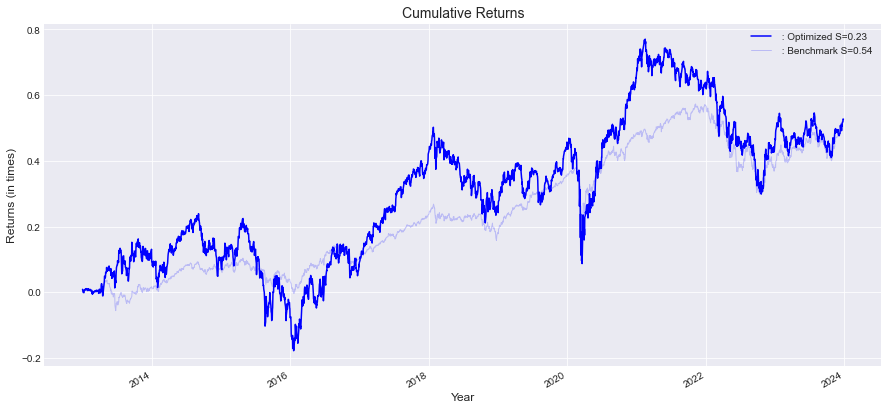

In [120]:
# Plot the portfolio and benchmark returns
plot_returns(strategy_returns, data)

In [121]:
print(len(strategy_returns))

2829


### Backtest with pyfolio

In [190]:
# Multiply values by weights and sum along the columns to get the portfolio returns
mv_wf_rets = (strategy_returns * weights).sum(axis=1)

# Convert to pandas Series
mv_wf_rets_series = pd.Series(mv_wf_rets, name='MV WF Returns')
mv_wf_rets_series = mv_wf_rets_series.iloc[60:]

In [191]:
# Calculate equally-weighted portfolio's returns
daily_returns = data.pct_change().dropna()

# Start calculation from 20/06/2013
start_date = mv_wf_rets_series.index[0]
daily_returns = daily_returns.loc[start_date:]

# Calculate the equally-weighted portfolio returns
equal_weights = [1/12] * 12
ew_returns = daily_returns.dot(equal_weights)

# Convert to pandas series
ew_portfolio_returns = pd.Series(ew_returns, name='Equally Weighted Portfolio Returns')

In [192]:
print(mv_wf_rets_series.head())
print(mv_wf_rets_series.index)

print(ew_portfolio_returns.head())
print(ew_portfolio_returns.index)

Date
2013-03-26   -0.010043
2013-03-27    0.007101
2013-03-28   -0.005288
2013-04-01    0.010886
2013-04-02   -0.005009
Name: MV WF Returns, dtype: float64
DatetimeIndex(['2013-03-26', '2013-03-27', '2013-03-28', '2013-04-01',
               '2013-04-02', '2013-04-03', '2013-04-04', '2013-04-05',
               '2013-04-08', '2013-04-09',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=2769, freq=None)
Date
2013-03-26    0.004041
2013-03-27    0.001581
2013-03-28    0.000503
2013-04-01   -0.004247
2013-04-02    0.000956
Name: Equally Weighted Portfolio Returns, dtype: float64
DatetimeIndex(['2013-03-26', '2013-03-27', '2013-03-28', '2013-04-01',
               '2013-04-02', '2013-04-03', '2013-04-04', '2013-04-05',
               '2013-04-08', '2013-04-09',
               ..

Start date,2013-03-26
End date,2023-12-29
Total months,131
,Backtest
Annual return,2.684%
Cumulative returns,33.779%
Annual volatility,20.38%
Sharpe ratio,0.23
Calmar ratio,0.07
Stability,0.41
Max drawdown,-39.822%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.82,2021-02-16,2022-10-21,NaT,NaN
1,38.20,2018-01-25,2020-03-20,2020-11-23,738
2,36.05,2014-09-04,2016-01-19,2017-07-13,746
3,14.23,2013-10-21,2014-01-31,2014-06-05,164
4,9.72,2013-07-17,2013-08-29,2013-09-17,45


Stress Events,mean,min,max
Apr14,0.02%,-1.51%,1.26%
Oct14,0.12%,-2.17%,2.01%
Fall2015,-0.17%,-4.37%,4.42%
New Normal,0.02%,-12.48%,8.05%


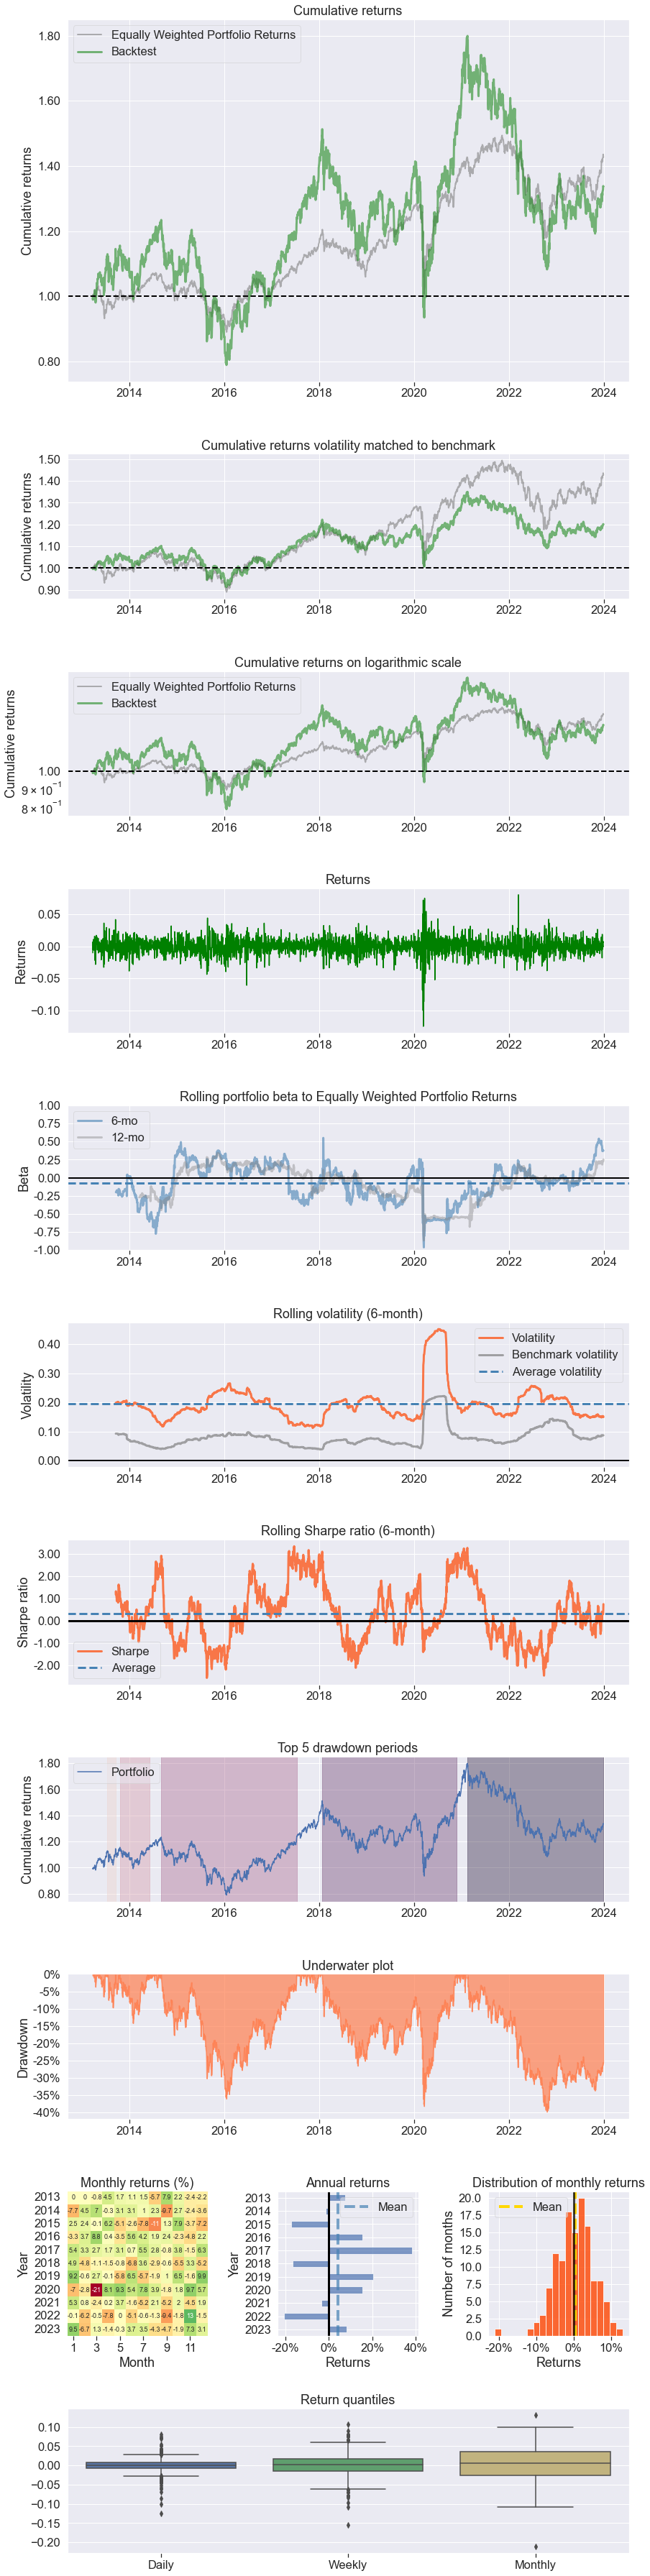

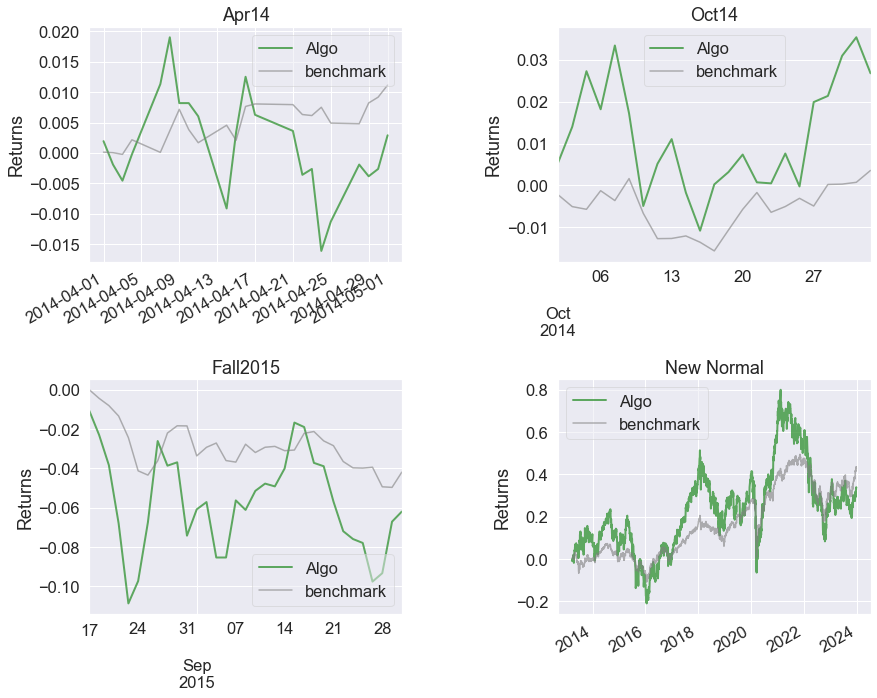

In [193]:
pf.create_full_tear_sheet(mv_wf_rets_series, benchmark_rets=ew_portfolio_returns)

## LSTM WFO - Long only with no leverage and no exogenous features

<a id='build'></a>
### Steps
The steps to build the model are as follows:

#### Step 1:
Use the constructor method `__init__(self)` to initialise the class instance with two attributes, `self.data` and `self.model`, both are initially set to None. These attributes will be used to store financial data and the trained 
LSTM model.

#### Step 2:
The `build` method sets up the architecture of the LSTM model:
* It creates a Sequential model containing an LSTM layer with 64 neurons.
* The output layer is a densely connected neural network layer. The size of this output was earlier equivalent to the number of assets in our portfolio. However, for long-short it will be twice that size. This means that if we trade $N$ assets, we need $N*2$ weights.
* The `softmax` activation is a function that transforms the network's numerical predictions into specific sets of values.

#### Step 3:
Customise the `sharpe_loss` function. Here we need to make some modifications considering that we now need to optimise a long-short portfolio.

We will first split the output into 2 sides i.e. long and short sides. Then we multiply the returns in `self.data` with the portfolio weights i.e. the weights which we obtained from the softmax function in `y_pred`.

Now we need to subtract the short side of the portfolio from the long side to get the net exposure. We then sum up the differences between the long and short sides for each time step (hence, axis=1) in `portfolio_values`. Finally, the Sharpe ratio is calculated as the mean of the portfolio returns divided by their standard deviation.

*Note:<br> 
Previously we were calculating the portfolio returns inside the loss function, now we can skip that step because we  input returns instead of prices.*

#### Step 4:
Compile the model using `model.compile`. Here we specify the loss function and our choice of optimizer will be Adam.

#### Step 5:
After building the model, we will create the `calc_wgts` function. Almost everything here is the same as the long-only portfolio. The only difference is that we are doubling the output size here.

Here, we first need to supply it with a set of input features. LSTMs consume a 3D feature set.

This feature set is produced in a single step using a list comprehension. While it looks slightly daunting, it is in fact quite straightforward:
 - Loop through all lookback values from 0 to $T$
 - Shift the returns data by $k$ periods
 - Only use the sign of the returns, which is usually easier to process

We end up with a 3D array of features at different time steps, which we can now feed into our LSTM for training. The list is concatenated into a Numpy array for processing and splitting the data.

The implementation of the long/short version is shown in the code below, where the relevant modifications are triple quoted.

### Defining LSTM and walk-forward function

In [90]:
class Model:
    def __init__(self, max_weight=1):
        self.data = None
        self.model = None
        self.max_weight = max_weight

    """Setup of the LSTM"""

    def build(self, input_shape, outputs):
        model = Sequential([
            LSTM(64, input_shape=input_shape, 
                 kernel_regularizer=l2(10),
                 recurrent_dropout=0.1,
                 kernel_initializer='glorot_uniform',
                 activation ='tanh'),                  
            Dense(outputs, activation='softmax')])
           

        def sharpe_loss(_, weights):
            """Multiply prices with weights and sum for each time step"""
            portfolio_values = tf.reduce_sum(tf.multiply(self.data, weights), axis=1)

            """Calculate Sharpe ratio"""
            sharpe = (K.mean(portfolio_values) - 0.02) / K.std(portfolio_values)

            """Return negative Sharpe"""
            return -sharpe
        

        optimizer = RMSprop(learning_rate=0.01, rho=0.85, momentum=0.9)
        
        model.compile(loss=sharpe_loss, optimizer=optimizer)
        
        return model

    def calc_wgts(self, lkbk: int, ep: int, data: pd.DataFrame, features: pd.DataFrame, patience=3):
        
        # Scale the features
        features = [features.shift(k).fillna(0).values[lkbk:] for k in range(lkbk)]
        
        # Create Numpy array from features
        data_array = np.concatenate(features, axis=1)
                    
        # Split off train set
        data = data.iloc[lkbk:]
        
        # Convert data to tensorflow format for processing in loss function
        self.data = tf.cast(tf.constant(data), float)

        # Building a new model
        if self.model is None:
            self.model = self.build(data_array.shape, len(data.columns))
        
        early_stopping = EarlyStopping(monitor='loss', patience=patience, restore_best_weights=True)

        # Adding a new axis to features
        fit_predict_data = data_array[np.newaxis, :]

        # Adding new axis to classifier
        """Extending the length of the output vector"""
        y = np.zeros(len(data.columns))[np.newaxis, :]

        # Fit the model  
        self.model.fit(fit_predict_data, y, epochs=ep, shuffle=False, callbacks=[early_stopping]) 

        # Predict weights
        weights = self.model.predict(fit_predict_data)[0]

        # Cap weights at max_weight
        weights = np.minimum(weights, self.max_weight)
        
        return weights


def walk_forward(df, lookback, n_epochs, step, features):
    start = 0
    split = start + step
    n_window = 60
    all_rets = []
    weights_list = []

    """Initialise the model with a max weight constraint"""
    model = Model(max_weight=1)

    """Run WFO loop"""
    while split + n_window < df.index[-1]:
        print(split)

        """Move start and split dates by n_window"""
        start = start + n_window
        split = split + n_window
        
        """Create IS dataset"""
        dff = df.iloc[start:].ffill().bfill()
        rets = dff.pct_change().fillna(0)
        
        """Run LSTM"""
        asset_weights = model.calc_wgts(lookback, n_epochs, dff.loc[:split], features.loc[:split], patience=3)

        """Collect the OOS results"""
        oos = rets.loc[split:split+n_window-1].mul(asset_weights).sum(axis=1)
        all_rets.append(oos)

        """Accumulate PnL"""
        pnl = pd.concat(all_rets)
        
        # Append long-short weights of assets to the list
        weights_list.append(asset_weights)
        
    # Combine all long-short weights into a DataFrame
    weights_df = pd.DataFrame(weights_list, columns=df.columns)
    
    return pnl, weights_df

### Defining the plot_returns_optimised function

In [91]:
def plot_returns_optimised(srets, stk, c='b', aclass='', split=None, plot_title='Cumulative Returns'):
    if split is None:
        split = '2000-1-1'
    
    if len(srets.shape) == 1:
        rets = srets
    else:
        rets = srets.sum(axis=1)

    S = rets.mean() / rets.std() * 16
    Sos = rets.loc[split:].mean() / rets.loc[split:].std() * 16
    rets.cumsum().plot(label=f'{aclass} : Optimized Sharpe={S:.2f}/{Sos:.2f}', c=c)
    
    if len(stk.shape) == 1:
        bm = stk
    else:
        bm = stk.mean(axis=1).pct_change()

    Sbm = bm.mean() / bm.std() * 16
    Sbmos = bm.loc[split:].mean() / bm.loc[split:].std() * 16
    bm.loc[rets.index[0]:].cumsum().plot(label=f'{aclass} : Benchmark Sharpe={Sbm:.2f}/{Sbmos:.2f}', lw=1, alpha=0.2, c=c)

    if not split == '2000-1-1':
        xmin, xmax, ymin, ymax = plt.axis()
        plt.scatter([parse(split)] * 50, np.linspace(ymin, ymax, 50), s=1)

    plt.legend(fontsize=15)
    plt.title(plot_title, fontsize=14) 
    plt.ylabel('Returns (in times)', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.show()

### Run the model

In [92]:
# Store index of 'data` dataframe in 'data_index'
data_index = data.index

data_lstm = data.copy()

# Reset the index
data_lstm.index = range(0, len(data_lstm))

# Setting features equal to daily returns of assets
features = data_lstm.pct_change()

In [93]:
# Reset states generated by Keras
K.clear_session()

In [94]:
# Set the seed to reproduce the results
set_seed(1)

#walk_forward(df, lookback, n_epochs, step, features)
pnl, weights_df = walk_forward(data_lstm, 20, 100, 60, features.fillna(0))

# Set the index to datetime index from 'data' dataframe 
pnl.index = data_index[-len(pnl):]

60
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 2419.7109
Epoch 2/100
1/1 [==============================] - 0s 71ms/step - loss: 1080.7603
Epoch 3/100
1/1 [==============================] - 0s 121ms/step - loss: 206.1453
Epoch 4/100
1/1 [==============================] - 0s 136ms/step - loss: 269.6362
Epoch 5/100
1/1 [==============================] - 0s 178ms/step - loss: 826.8268
Epoch 6/100
1/1 [==============================] - 0s 244ms/step
120
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 185.1478
Epoch 2/100
1/1 [==============================] - 0s 108ms/step - loss: -11.9325
Epoch 3/100
1/1 [==============================] - 0s 210ms/step - loss: 123.4517
Epoch 4/100
1/1 [==============================] - 0s 174ms/step - loss: 373.2129
Epoch 5/100
1/1 [==============================] - 0s 281ms/step
180
Epoch 1/100
1/1 [==============================] - 0s 149ms/step - loss: 123.3935
Epoch 2/100
1/1 [===========================

1/1 [==============================] - 1s 611ms/step
2220
Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 6835.1660
Epoch 2/100
1/1 [==============================] - 5s 5s/step - loss: 6800.1689
Epoch 3/100
1/1 [==============================] - 5s 5s/step - loss: 6876.4282
Epoch 4/100
1/1 [==============================] - 5s 5s/step - loss: 6827.0728
Epoch 5/100
1/1 [==============================] - 0s 495ms/step
2280
Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 6889.0811
Epoch 2/100
1/1 [==============================] - 5s 5s/step - loss: 6885.4688
Epoch 3/100
1/1 [==============================] - 5s 5s/step - loss: 6791.8311
Epoch 4/100
1/1 [==============================] - 5s 5s/step - loss: 6906.2324
Epoch 5/100
1/1 [==============================] - 5s 5s/step - loss: 6891.0913
Epoch 6/100
1/1 [==============================] - 1s 660ms/step
2340
Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 6887.6226
Ep

### Plot backtest

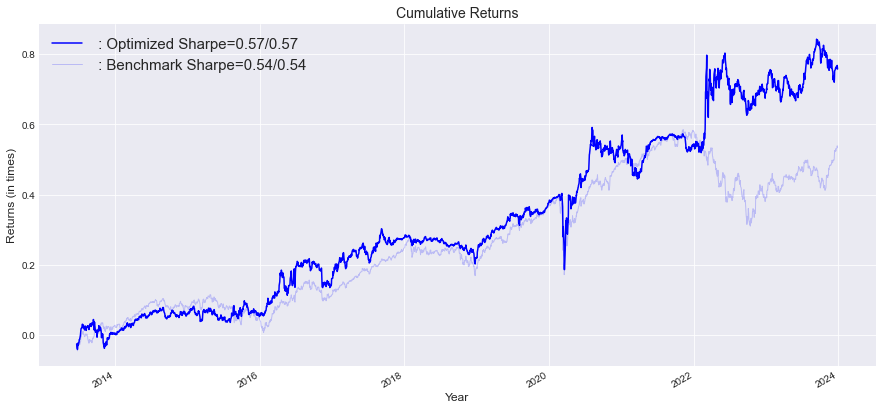

In [95]:
# Plot the returns
plt.figure(figsize=[15, 7])
plot_returns_optimised(pnl, data, c='b', aclass='')

### Access weights

In [113]:
weights_df.head()

,EEM,EMB,EWJ,GSG,HYG,IEML.L,IEV,IGIL.L,IGLN.L,IVV,LQD,TLT
0,0.001,0.0008,0.0019,0.4293,0.2507,0.0011,0.1411,0.0190,0.0033,0.124,0.0270,0.0008
1,0.000,0.0000,0.0000,0.9855,0.0007,0.0000,0.0015,0.0070,0.0003,0.000,0.0050,0.0000
2,0.000,0.0000,0.0000,0.0568,0.0001,0.0000,0.0010,0.6625,0.0009,0.000,0.2785,0.0001
3,0.000,0.0000,0.0000,0.0027,0.0000,0.0000,0.0002,0.5680,0.0002,0.000,0.4289,0.0000
4,0.000,0.0000,0.0000,0.0005,0.0000,0.0000,0.0001,0.6117,0.0001,0.000,0.3876,0.0000


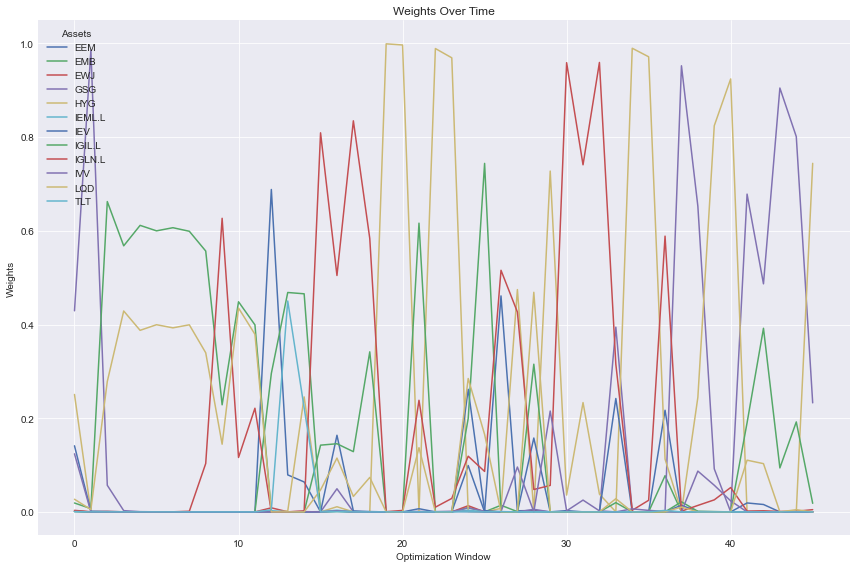

In [115]:
# Plot line chart for each column
weights_df.plot(kind='line', figsize=(12, 8))

# Add title and labels
plt.title('Weights Over Time')
plt.xlabel('Optimization Window')
plt.ylabel('Weights')
plt.legend(title='Assets', loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

In [97]:
#weights_df.to_excel('weights_LSTM.xlsx')

### Backtest with pyfolio

In [127]:
# Calculate equally-weighted portfolio's returns
daily_returns = data.pct_change().dropna()

# Start calculation from 20/06/2013
start_date = pnl.index[0]
daily_returns = daily_returns.loc[start_date:]

# Calculate the equally-weighted portfolio returns
equal_weights = [1/12] * 12
ew_returns = daily_returns.dot(equal_weights)

# Convert to pandas series
ew_portfolio_returns = pd.Series(ew_returns, name='Equally Weighted Portfolio Returns')

Start date,2013-06-20
End date,2023-12-29
Total months,129
,Backtest
Annual return,6.459%
Cumulative returns,95.97%
Annual volatility,12.533%
Sharpe ratio,0.56
Calmar ratio,0.32
Stability,0.95
Max drawdown,-19.946%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.95,2020-03-06,2020-03-19,2020-05-26,58
1,17.65,2022-03-08,2022-09-27,2023-09-13,397
2,14.33,2020-08-06,2021-03-23,2022-03-01,409
3,11.82,2023-09-14,2023-12-12,NaT,NaN
4,9.69,2017-09-07,2018-12-24,2019-04-10,415


Stress Events,mean,min,max
Apr14,0.08%,-0.33%,0.52%
Oct14,0.03%,-0.35%,0.71%
Fall2015,-0.01%,-1.68%,1.41%
New Normal,0.03%,-10.15%,5.80%


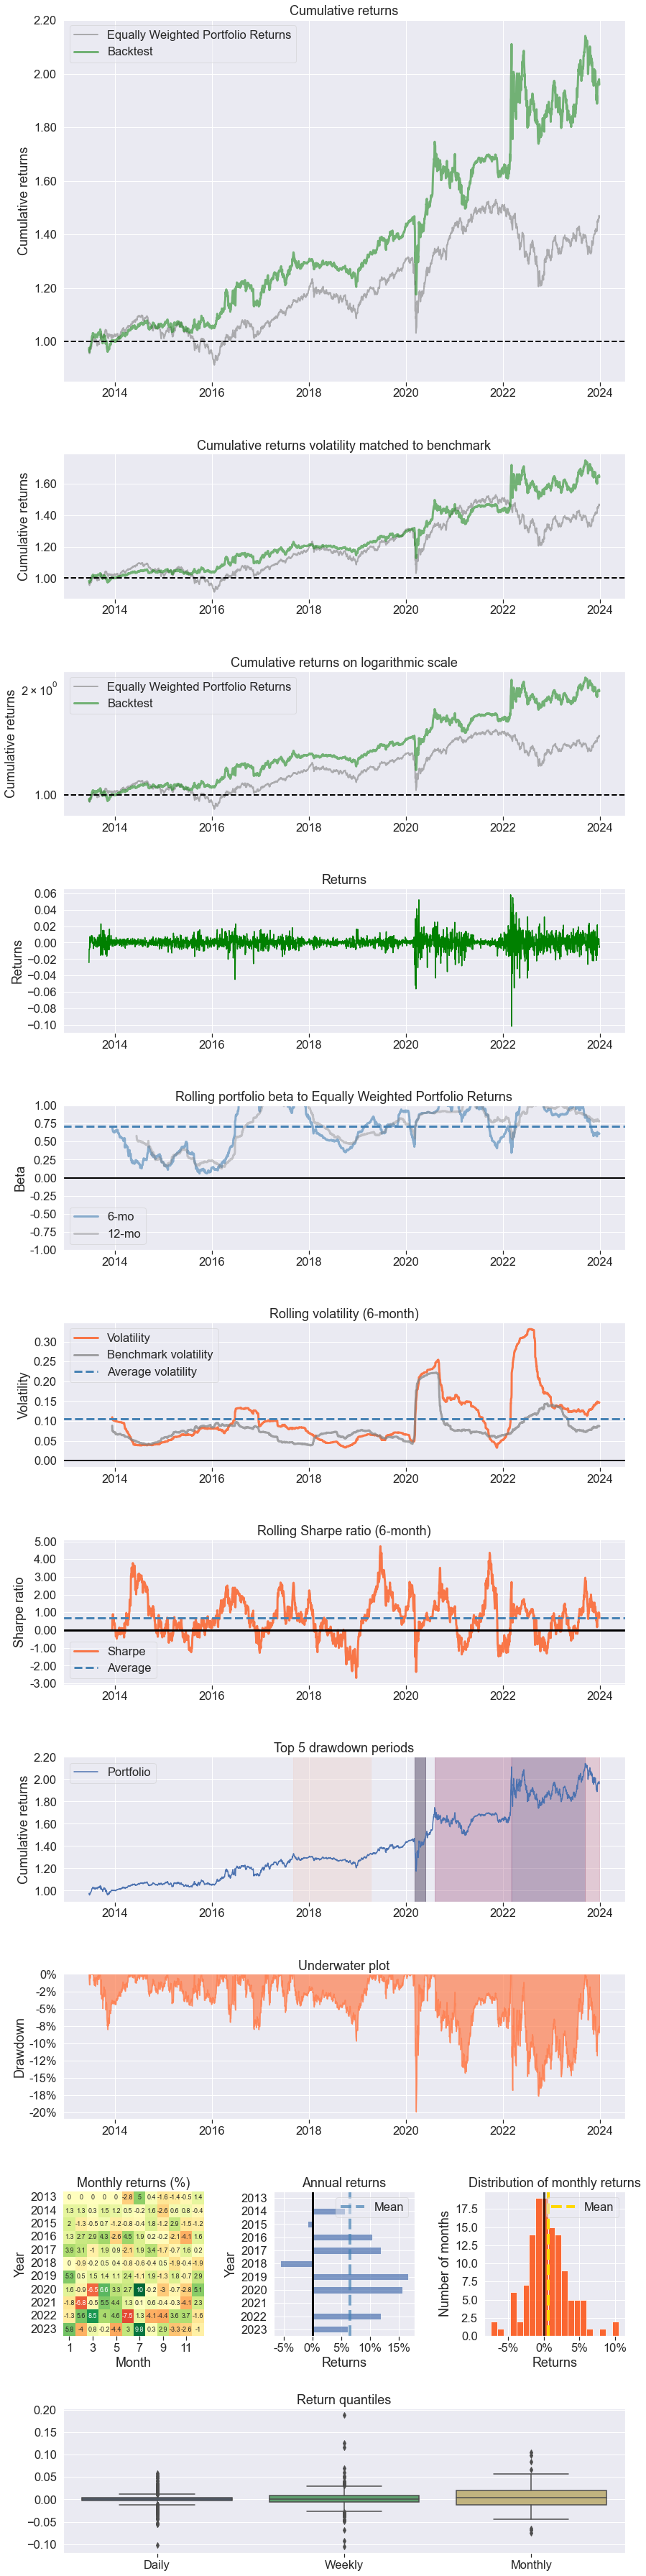

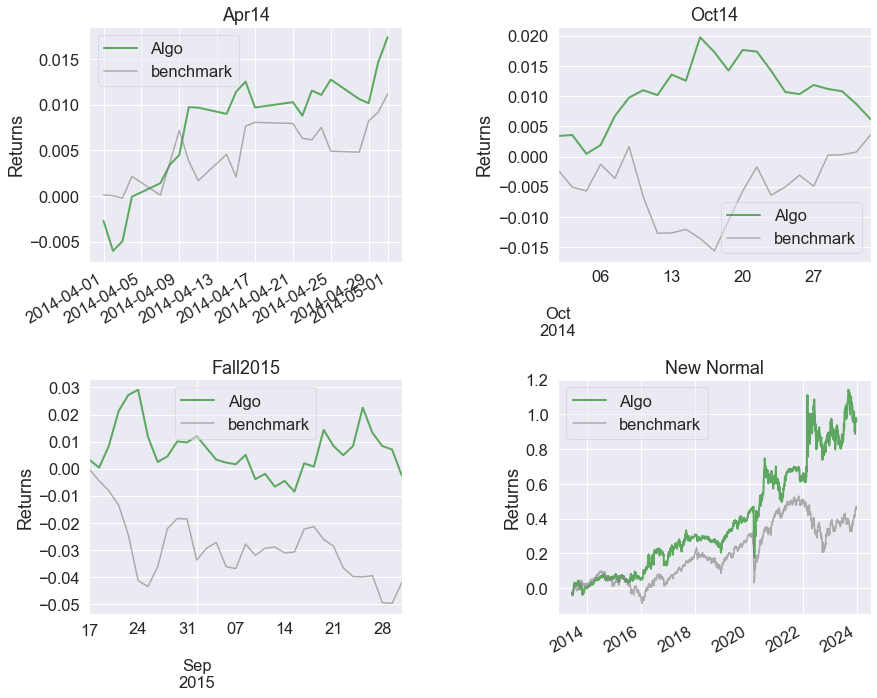

In [128]:
pf.create_full_tear_sheet(pnl, benchmark_rets=ew_portfolio_returns)

## LSTM WFO - with no leverage but using exogenous features

### Import exogenous variables from Fred

In [146]:
features = pd.DataFrame()
features['10-FF'] = fred.get_series(series_id='T10YFF', frequency='d', observation_start=start, observation_end=end)
features['IG_Spreads'] = fred.get_series(series_id='BAMLC0A0CM', frequency='d', observation_start=start, observation_end=end)
features['HY_Spreads'] = fred.get_series(series_id='BAMLH0A0HYM2', frequency='d', observation_start=start, observation_end=end)
features['Brent'] = fred.get_series(series_id='DCOILBRENTEU', frequency='d', observation_start=start, observation_end=end)
features['VIX'] = fred.get_series(series_id='VIXCLS', frequency='d', observation_start=start, observation_end=end)
features['5y_BE'] = fred.get_series(series_id='T5YIE', frequency='d', observation_start=start, observation_end=end)
features['DXY'] = fred.get_series(series_id='DTWEXBGS', frequency='d', observation_start=start, observation_end=end)
features['PCR'] = fred.get_series(series_id='RIFSRPF02ND', frequency='d', observation_start=start, observation_end=end)
features['EMOAS'] = fred.get_series(series_id='BAMLEMCLLCRPIUSOAS', frequency='d', observation_start=start, observation_end=end)

features.head()

,10-FF,IG_Spreads,HY_Spreads,Brent,VIX,5y_BE,DXY,PCR,EMOAS
2012-12-31,1.69,1.54,5.34,110.80,18.02,2.09,91.0834,0.75,3.05
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75,NaN
2013-01-02,1.69,1.50,5.16,112.98,14.68,2.12,90.6941,0.75,2.98
2013-01-03,1.75,1.48,5.06,113.03,14.56,2.11,90.8097,0.75,2.91
2013-01-04,1.77,1.46,5.04,112.58,13.83,2.13,91.1025,0.75,2.87


In [147]:
features.fillna(method='ffill', inplace=True)

In [148]:
print(len(features))

2870


### Aligning features and prices data

In [149]:
# Subset "features" based on the index of "data"
features_sub = features.loc[data.index]
print(len(features_sub))

2829


In [150]:
data_rets = data.pct_change().fillna(0)
features_sub = pd.concat([features_sub, data_rets], axis=1)

In [151]:
features_sub

,10-FF,IG_Spreads,HY_Spreads,Brent,VIX,5y_BE,DXY,PCR,EMOAS,EEM,...,EWJ,GSG,HYG,IEML.L,IEV,IGIL.L,IGLN.L,IVV,LQD,TLT
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,1.69,1.54,5.34,110.80,18.02,2.09,91.0834,0.75,3.05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-01-02,1.69,1.50,5.16,112.98,14.68,2.12,90.6941,0.75,2.98,0.019617,...,0.024616,0.003050,0.009427,0.007654,0.014504,-0.009507,0.019359,0.024382,0.002314,-0.013368
2013-01-03,1.75,1.48,5.06,113.03,14.56,2.11,90.8097,0.75,2.91,-0.007076,...,-0.009009,-0.004865,-0.003077,-0.000723,-0.013544,-0.005945,-0.007715,-0.001296,-0.005442,-0.013550
2013-01-04,1.77,1.46,5.04,112.58,13.83,2.13,91.1025,0.75,2.87,0.002004,...,-0.004040,-0.002139,0.000638,-0.008946,0.007119,-0.009221,-0.022129,0.004917,-0.000497,0.003901
2013-01-07,1.76,1.45,5.02,112.49,13.79,2.16,90.9852,0.75,2.85,-0.007557,...,-0.009128,0.005511,0.000851,0.004539,-0.000757,0.003912,0.003364,-0.003126,0.001659,0.000422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-1.43,1.07,3.39,80.23,13.03,2.16,119.4214,5.50,2.46,-0.004802,...,0.003168,-0.003920,-0.001161,0.000868,0.001334,0.000858,0.010563,0.001916,-0.001723,-0.004549
2023-12-26,-1.44,1.06,3.37,80.23,12.99,2.17,119.2551,5.50,2.45,0.007872,...,-0.000316,0.014265,0.001937,0.000000,0.005519,0.000000,0.000000,0.004308,0.002089,0.002843
2023-12-27,-1.54,1.05,3.34,80.97,12.43,2.12,118.8525,5.50,2.51,0.005795,...,0.005528,-0.006790,0.004122,0.008894,0.004920,0.006132,0.007839,0.001904,0.009336,0.017720


In [152]:
#features_sub = features_sub.iloc[:, :8]

In [153]:
features_sub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2829 entries, 2012-12-31 to 2023-12-29
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   10-FF       2829 non-null   float64
 1   IG_Spreads  2829 non-null   float64
 2   HY_Spreads  2829 non-null   float64
 3   Brent       2829 non-null   float64
 4   VIX         2829 non-null   float64
 5   5y_BE       2829 non-null   float64
 6   DXY         2829 non-null   float64
 7   PCR         2829 non-null   float64
 8   EMOAS       2829 non-null   float64
 9   EEM         2829 non-null   float64
 10  EMB         2829 non-null   float64
 11  EWJ         2829 non-null   float64
 12  GSG         2829 non-null   float64
 13  HYG         2829 non-null   float64
 14  IEML.L      2829 non-null   float64
 15  IEV         2829 non-null   float64
 16  IGIL.L      2829 non-null   float64
 17  IGLN.L      2829 non-null   float64
 18  IVV         2829 non-null   float64
 19  LQD      

### Defining the model with exogenous variables

In [160]:
class Model_exog:
    def __init__(self, max_weight=1):
        self.data = None
        self.model = None
        self.max_weight = max_weight

    """Setup of the LSTM"""
    def build(self, input_shape, outputs):
        model = Sequential([
            LSTM(64, input_shape=input_shape, 
                 kernel_regularizer=l2(5),
                 recurrent_dropout=0.1,
                 kernel_initializer='glorot_uniform',
                 activation ='tanh'),
            Dense(outputs, activation='softmax')
        ])

        def sharpe_loss(_, weights):
            """Multiply prices with weights and sum for each time step"""
            portfolio_values = tf.reduce_sum(tf.multiply(self.data, weights), axis=1)

            """Calculate Sharpe ratio"""
            sharpe = (K.mean(portfolio_values) - 0.02) / K.std(portfolio_values)

            """Return negative Sharpe"""
            return -sharpe

        optimizer = RMSprop(learning_rate=0.01, rho=0.85, momentum=0.9)
        
        model.compile(loss=sharpe_loss, optimizer=optimizer)
        
        return model
    
    def calc_wgts(self, lkbk: int, ep: int, split: int, data: pd.DataFrame, features: pd.DataFrame, patience=3):
        # Scale the features
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features.iloc[:split])
        features = pd.DataFrame(scaled_features, columns=features.columns)
        features = [features.shift(k).fillna(0).values[lkbk:] for k in range(lkbk)]
        
        # Create Numpy array from features
        data_array = np.concatenate(features, axis=1)
                    
        # Split off train set
        data = data.iloc[lkbk:]
        
        # Convert data to tensorflow format for processing in loss function
        self.data = tf.cast(tf.constant(data), float)

        # Building a new model
        if self.model is None:
            self.model = self.build(data_array.shape, len(data.columns))
        
        early_stopping = EarlyStopping(monitor='loss', patience=patience, restore_best_weights=True)

        # Adding a new axis to features
        fit_predict_data = data_array[np.newaxis, :]

        # Adding new axis to classifier
        y = np.zeros(len(data.columns))[np.newaxis, :]

        # Fit the model  
        self.model.fit(fit_predict_data, y, epochs=ep, shuffle=False, callbacks=[early_stopping]) 

        # Predict weights
        weights = self.model.predict(fit_predict_data)[0]

        # Cap weights at max_weight
        weights = np.minimum(weights, self.max_weight)
        
        return weights

    

def walk_forward(df, lookback, n_epochs, step, features):
    start = 0
    split = start + step
    n_window = 60
    all_rets = []
    weights_list = []

    """Initialise the model with a max weight constraint"""
    model = Model_exog(max_weight=1)

    """Run WFO loop"""
    while split + n_window < df.index[-1]:
        print(split)

        """Move start and split dates by n_window"""
        start = start + n_window
        split = split + n_window
        
        """Create IS dataset"""
        dff = df.iloc[start:].ffill().bfill()
        rets = dff.pct_change().fillna(0)
        
        """Run LSTM"""
        asset_weights = model.calc_wgts(lookback, n_epochs, split, dff.loc[:split], features.loc[:split], patience=3)

        """Collect the OOS results"""
        oos = rets.loc[split:split+n_window-1].mul(asset_weights).sum(axis=1)
        all_rets.append(oos)

        """Accumulate PnL"""
        pnl = pd.concat(all_rets)
        
        # Append long-short weights of assets to the list
        weights_list.append(asset_weights)
        
    # Combine all long-short weights into a DataFrame
    weights_df = pd.DataFrame(weights_list, columns=df.columns)
    
    return pnl, weights_df

### Run the model

In [161]:
# Set the seed to reproduce the results
set_seed(1)

# Store index of 'data` dataframe in 'data_index'
data_index = data.index

data_lstm_exog = data.copy()

# Reset the index
data_lstm_exog.index = range(0, len(data_lstm_exog))

feat = features_sub.copy()

# Reset the index
feat.index = range(0, len(feat))

In [162]:
# Reset states generated by Keras
K.clear_session()

In [163]:
# Set the seed to reproduce the results
set_seed(1)

#walk_forward(df, lookback, n_epochs, step, features)
pnl, weights_df = walk_forward(data_lstm, 20, 100, 60, feat.fillna(0))

# Set the index to datetime index from 'data' dataframe 
pnl.index = data_index[-len(pnl):]

60
Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1544.0867
Epoch 2/100
1/1 [==============================] - 0s 249ms/step - loss: 590.1578
Epoch 3/100
1/1 [==============================] - 0s 227ms/step - loss: 228.5316
Epoch 4/100
1/1 [==============================] - 0s 259ms/step - loss: 516.7944
Epoch 5/100
1/1 [==============================] - 0s 296ms/step - loss: 926.8300
Epoch 6/100
1/1 [==============================] - 0s 415ms/step
120
Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 502.9435
Epoch 2/100
1/1 [==============================] - 0s 292ms/step - loss: 6.7577
Epoch 3/100
1/1 [==============================] - 0s 414ms/step - loss: 170.2406
Epoch 4/100
1/1 [==============================] - 0s 399ms/step - loss: 587.1081
Epoch 5/100
1/1 [==============================] - 1s 550ms/step
180
Epoch 1/100
1/1 [==============================] - 1s 569ms/step - loss: 173.7610
Epoch 2/100
1/1 [=============================

1/1 [==============================] - 6s 6s/step - loss: 434.0154
Epoch 2/100
1/1 [==============================] - 6s 6s/step - loss: 217.9991
Epoch 3/100
1/1 [==============================] - 6s 6s/step - loss: 182.9842
Epoch 4/100
1/1 [==============================] - 6s 6s/step - loss: 199.2599
Epoch 5/100
1/1 [==============================] - 6s 6s/step - loss: 149.6699
Epoch 6/100
1/1 [==============================] - 6s 6s/step - loss: 151.0170
Epoch 7/100
1/1 [==============================] - 6s 6s/step - loss: 139.1317
Epoch 8/100
1/1 [==============================] - 6s 6s/step - loss: 116.7620
Epoch 9/100
1/1 [==============================] - 6s 6s/step - loss: 253.0077
Epoch 10/100
1/1 [==============================] - 6s 6s/step - loss: 222.2377
Epoch 11/100
1/1 [==============================] - 1s 1s/step
2340
Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 243.4081
Epoch 2/100
1/1 [==============================] - 5s 5s/step - loss: 7.89

### Plot backtest

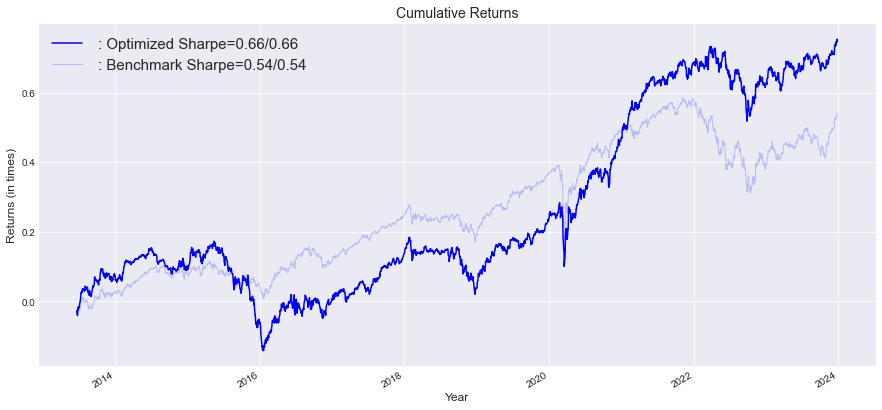

In [164]:
# Plot the returns
plt.figure(figsize=[15, 7])
plot_returns_optimised(pnl, data, c='b', aclass='')

### Access weights

In [166]:
weights_df.head()

,EEM,EMB,EWJ,GSG,HYG,IEML.L,IEV,IGIL.L,IGLN.L,IVV,LQD,TLT
0,0.000790,0.000269,0.001031,0.150684,0.025172,0.001071,0.158473,0.002750,0.006161,0.646984,0.005003,0.001611
1,0.021237,0.034023,0.085770,0.013026,0.057085,0.092982,0.367264,0.011534,0.082379,0.122025,0.010577,0.102099
2,0.000169,0.000166,0.000083,0.489662,0.030969,0.000071,0.234091,0.012728,0.210750,0.009426,0.010561,0.001324
3,0.017012,0.007600,0.010044,0.074668,0.191319,0.012529,0.100030,0.246721,0.111214,0.025809,0.158546,0.044509
4,0.000204,0.000294,0.000304,0.071882,0.061071,0.000433,0.445489,0.037253,0.336856,0.010001,0.031280,0.004934


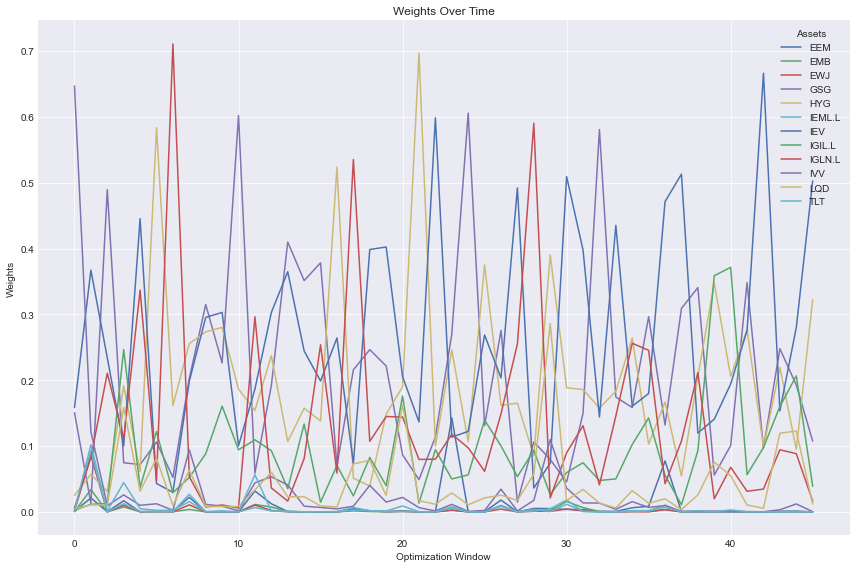

In [168]:
# Plot line chart for each column
weights_df.plot(kind='line', figsize=(12, 8))

# Add title and labels
plt.title('Weights Over Time')
plt.xlabel('Optimization Window')
plt.ylabel('Weights')
plt.legend(title='Assets', loc='upper right')
plt.tight_layout()

# Show plot
plt.show()

In [169]:
weights_df.to_excel('weights_LSTM_exog.xlsx')

### Backtest with pyfolio

In [170]:
# Calculate equally-weighted portfolio's returns
daily_returns = data.pct_change().dropna()

# Start calculation from 20/06/2013
start_date = pnl.index[0]
daily_returns = daily_returns.loc[start_date:]

# Calculate the equally-weighted portfolio returns
equal_weights = [1/12] * 12
ew_returns = daily_returns.dot(equal_weights)

# Convert to pandas series
ew_portfolio_returns = pd.Series(ew_returns, name='Equally Weighted Portfolio Returns')

Start date,2013-06-20
End date,2023-12-29
Total months,129
,Backtest
Annual return,6.6%
Cumulative returns,98.783%
Annual volatility,10.535%
Sharpe ratio,0.66
Calmar ratio,0.24
Stability,0.72
Max drawdown,-27.417%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,27.42,2015-05-15,2016-01-20,2019-09-16,1132
1,19.76,2022-03-30,2022-09-27,2023-12-26,455
2,17.06,2020-02-24,2020-03-18,2020-05-29,70
3,7.27,2014-07-04,2014-10-14,2015-04-16,205
4,5.61,2020-09-02,2020-10-30,2020-11-09,49


Stress Events,mean,min,max
Apr14,0.06%,-0.18%,0.39%
Oct14,-0.00%,-0.87%,0.64%
Fall2015,-0.14%,-2.09%,1.57%
New Normal,0.03%,-5.22%,4.59%


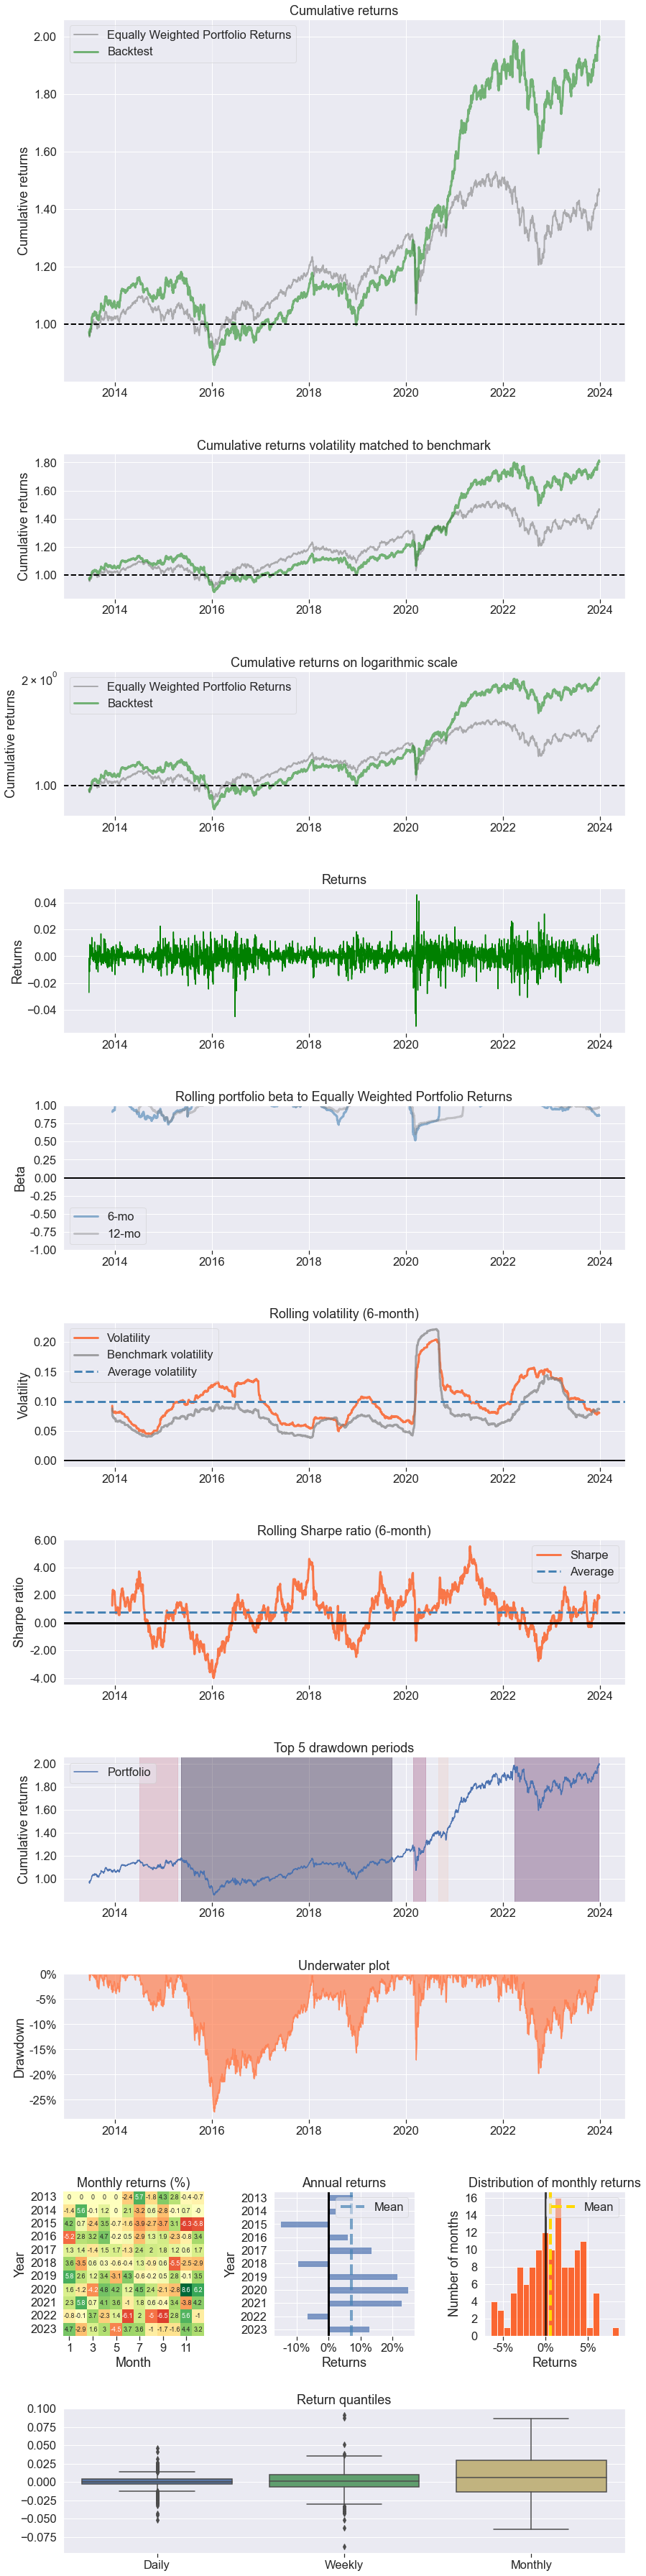

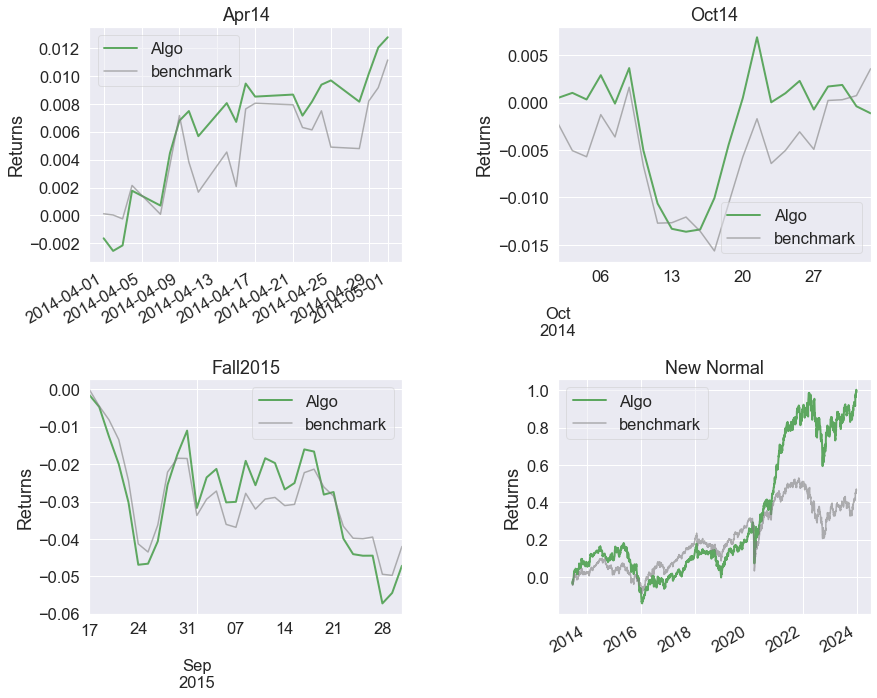

In [171]:
pf.create_full_tear_sheet(pnl, benchmark_rets=ew_portfolio_returns)